In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# How to use OrthoConv class

In [17]:
from ortho_conv import OrthoConv

In [18]:
(train_images, train_labels), (_, _) = tf.keras.datasets.cifar10.load_data()
train_images = train_images.astype('float32')

# Normalization
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

In [4]:
# Define instance
Conv_L1 = OrthoConv(
    filter_width=12,
    stride=4,
    input_channels=train_images.shape[3])

In [5]:
# Train
Conv_L1.fit(np.random.permutation(train_images)[0:30000,:,:,:], epochs=1)

2022-02-07 17:17:33.901564: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Total loss 0.007708699442446232, L2 loss 0.00043169764103367925


In [7]:
embed = Conv_L1.predict(train_images[0:2, :, :, :])
exact_inv = Conv_L1.exact_inverse(train_images[0:2, :, :, :].shape, embed)

print(np.mean((train_images[0:2, :, :, :]-exact_inv)**2))
# just to show we can recover the original images with the exact inverse function

1.5160616e-07


# How to use Gaussianisation class

In [1]:
!pip install "git+https://github.com/IPL-UV/rbig.git"

  Cloning https://github.com/IPL-UV/rbig.git to /private/var/folders/7d/6gdwpw211bz3fsprqbb9848m0000gq/T/pip-req-build-gi9wsncu
  Running command git clone --filter=blob:none --quiet https://github.com/IPL-UV/rbig.git /private/var/folders/7d/6gdwpw211bz3fsprqbb9848m0000gq/T/pip-req-build-gi9wsncu
  Resolved https://github.com/IPL-UV/rbig.git to commit 092d78a0ea5f9670c5cd4f70ff054ec58ff309af
  Preparing metadata (setup.py) ... done
  Created wheel for py-rbig: filename=py_rbig-0.0.1-py3-none-any.whl size=17242 sha256=27b3a290e3239e5244ca168a382442dd51dab621719d93ddd08287ee3a3bebf8
  Stored in directory: /private/var/folders/7d/6gdwpw211bz3fsprqbb9848m0000gq/T/pip-ephem-wheel-cache-9vqcv1ee/wheels/63/1a/33/ed4f2d8a6a5743bc05fd6253df8ba38b34dc3ebef7d9aa7219
Successfully built py-rbig


In [19]:
from gaussianisation import HistogramGaussianisation

In [20]:
gaussian_L1 = HistogramGaussianisation()

In [23]:
Z_G = gaussiani_L1 = gaussian_L1.fit(train_images)
gaussianised_images = gaussian_L1.predict(train_images)

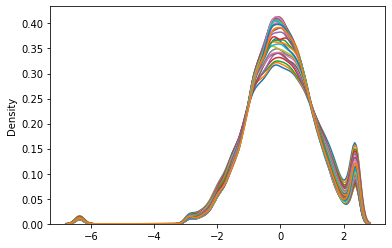

In [28]:
import seaborn as sns

for i in range(32):
    sns.kdeplot(gaussianised_images[:, i, 0, 0])